In [1]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lena = misc.imread('images/LENA_512.jpg')
ship = misc.imread('images/statek_640_505.jpg')

In [3]:
def greyscale(picture):
    grey_picture = np.copy(picture)
    for row in grey_picture:
        for col in row:
            col[0] = col[1] = col[2] = (int(col[0]) + int(col[1]) + int(col[2]))/3
    return grey_picture

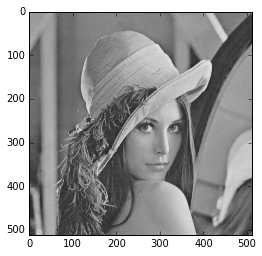

In [4]:
grey_lena = greyscale(lena)
plt.imshow(grey_lena)
plt.show()


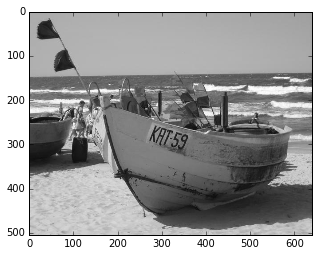

In [5]:
grey_ship = greyscale(ship)
plt.imshow(grey_ship)
plt.show()

In [6]:
def sepia(picture, w=30):
    sepia_picture = greyscale(picture)
    for row in sepia_picture:
        for col in row:
            col[0] = min(col[0] + 2*w, 255)
            col[1] = min(col[1] + w, 255)
    return sepia_picture

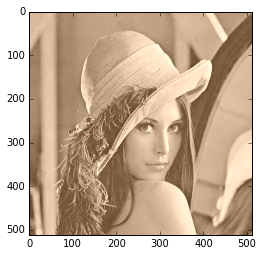

In [7]:
lena_sepia = sepia(lena)
plt.imshow(lena_sepia)
plt.show()

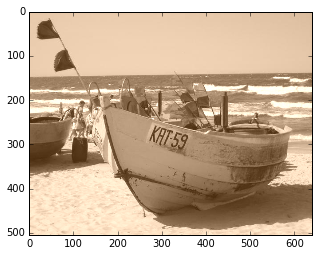

In [8]:
ship_sepia = sepia(ship)
plt.imshow(ship_sepia)
plt.show()

In [9]:
def negative(picture):
    negative_picture = np.copy(picture)
    for row in negative_picture:
        for col in row:
            col[0] = 255 - col[0]
            col[1] = 255 - col[1]
            col[2] = 255 - col[2]
    return negative_picture

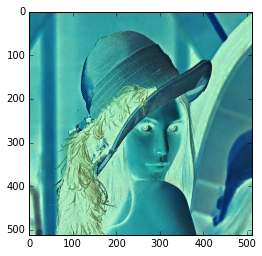

In [10]:
lena_negative = negative(lena)
plt.imshow(lena_negative)
plt.show()

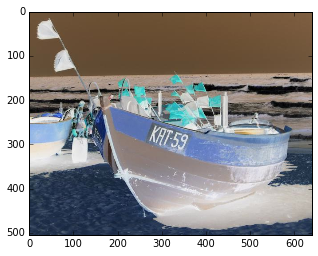

In [11]:
ship_negative = negative(ship)
plt.imshow(ship_negative)
plt.show()

In [12]:
def rotate(picture, angle):
    angle = angle * np.pi / 180.
    rotated_picture = np.full(np.shape(picture), 255, dtype=np.uint8)
    length, width, _ = np.shape(picture)
    for x, row in enumerate(picture):
        for y, col in enumerate(row):
            new_x = int(x * np.cos(angle) - y * np.sin(angle))
            new_y = int(x * np.sin(angle) + y * np.cos(angle))
            if new_x >= 0 and new_y >= 0 and new_y < length and new_x < width:
                rotated_picture[new_x, new_y] = col
        
    return rotated_picture


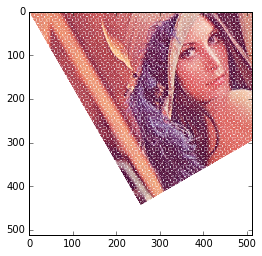

In [13]:
rotated_lena = rotate(lena, 30)
plt.imshow(rotated_lena)
plt.show()